In [1]:
# Импортируем все необходимые библиотеки:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, r2_score
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
# Загружаем файл в переменную:
df = pd.read_csv("kc_house_data.csv")
# Выводим первые 5 строк:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
# Выводим основную информацию о датасете:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Несмотря на большой размер датасета, в нем не оказалось **ни одного пропуска**, что, безусловно, очень радует.

In [6]:
# Проверяем на наличие дубликатов:
df.duplicated().sum()

0

Дубликатов тоже нет.

Столбцы <code>'id'</code> и <code>'date'</code> удаляем за ненадобностью:

In [7]:
# Удаляем столбцы:
df1 = df.drop(['id', 'date'], axis=1)
# Выводим первые 5 строк:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Выводим число уникальных значений каждого столбца:
df1.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [9]:
df1.query('yr_renovated == 0').count()

price            20699
bedrooms         20699
bathrooms        20699
sqft_living      20699
sqft_lot         20699
floors           20699
waterfront       20699
view             20699
condition        20699
grade            20699
sqft_above       20699
sqft_basement    20699
yr_built         20699
yr_renovated     20699
zipcode          20699
lat              20699
long             20699
sqft_living15    20699
sqft_lot15       20699
dtype: int64

In [10]:
df1 = df1.drop('yr_renovated', axis=1)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


In [11]:
categorial = ['floors', 'waterfront', 'view', 'condition', 'grade']
numerical = [col for col in df1.columns if col != 'price' and col not in categorial]

In [12]:
df1.shape

(21613, 18)

In [13]:
df1 = pd.get_dummies(df1, columns=categorial)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.0,3,1.00,1180,5650,1180,0,1955,98178,47.5112,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2170,400,1951,98125,47.7210,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,0,1933,98028,47.7379,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,910,1965,98136,47.5208,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,0,1987,98074,47.6168,...,0,0,0,0,1,0,0,0,0,0


In [14]:
df1.shape

(21613, 43)

### LinearRegression

In [15]:
X = df1.drop('price', axis=1)
y = df1['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=19)

In [16]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 39371797232.67527
R2 на train: 0.7271596527952955
R2 на test: 0.7352688339107911


In [17]:
# числовые характеристики:
df1[numerical + ['price']].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


<Axes: ylabel='price'>

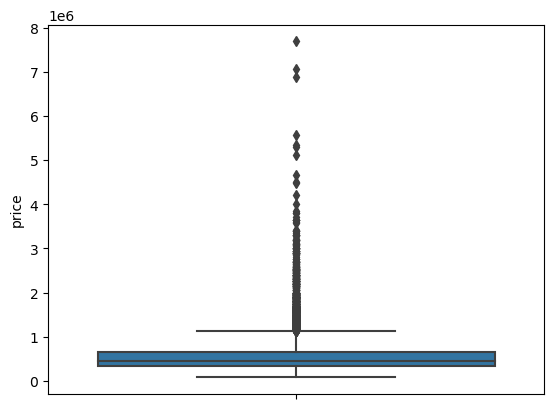

In [18]:
sns.boxplot(data=df1, y='price')

In [19]:
qh = df1["price"].quantile(0.99)
df1 = df1.query('price <= @qh').reset_index(drop=True)
df1.shape

(21396, 43)

<Axes: ylabel='price'>

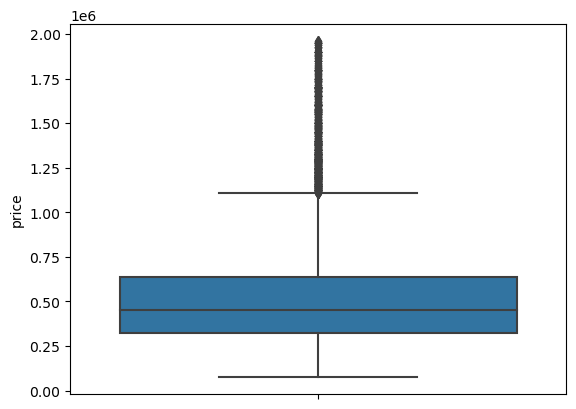

In [20]:
sns.boxplot(data=df1, y='price')

In [21]:
X = df1.drop('price', axis=1)
y = df1['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=19)

In [22]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 22451226886.628086
R2 на train: 0.7222781599941213
R2 на test: 0.7240189733112812


### PCA

In [23]:
pca = PCA(n_components=29, whiten=True)
pca = pca.fit(train_X)
X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(test_X)

In [24]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_pca, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(X_test_pca)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(X_train_pca, train_y)}")
print(f"R2 на test: {model.score(X_test_pca, test_y)}")

MSE на тестовом наборе: 23299686507.11559
R2 на train: 0.7139599250783337
R2 на test: 0.7135893091174936


### Lasso

In [25]:
# Обучение модели линейной регрессии
model = Lasso()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 22453297925.285316
R2 на train: 0.7222780203572446
R2 на test: 0.7239935151312975


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+14, tolerance: 1.158e+11
  model = cd_fast.enet_coordinate_descent(


### Ridge

In [26]:
# Обучение модели линейной регрессии
model = Ridge()
model.fit(train_X, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X, train_y)}")
print(f"R2 на test: {model.score(test_X, test_y)}")

MSE на тестовом наборе: 22457061974.34386
R2 на train: 0.7222660206327356
R2 на test: 0.7239472456722194


### PermutationImportance

In [27]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_X, train_y)

perm = PermutationImportance(model, random_state=19).fit(test_X, test_y)

In [28]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.1694 ± 0.0040,lat
0.1440 ± 0.0044,grade_7
0.0965 ± 0.0035,grade_6
0.0941 ± 0.0032,yr_built
0.0736 ± 0.0037,sqft_living
0.0363 ± 0.0037,grade_10
0.0348 ± 0.0039,grade_8
0.0325 ± 0.0022,grade_11
0.0196 ± 0.0022,view_0
0.0178 ± 0.0033,grade_5


In [29]:
cols = ['lat', 'grade_7', 'grade_6', 'yr_built', 'sqft_living', 'grade_10', 'grade_8', 'grade_11']

In [30]:
train_X_perm = train_X[cols]
test_X_perm = test_X[cols]

In [31]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(train_X_perm, train_y)

# Проверка качества модели на тестовом наборе
y_pred = model.predict(test_X_perm)
mse = mean_squared_error(test_y, y_pred)
print(f'MSE на тестовом наборе: {mse}')

# проверяем r2
print(f"R2 на train: {model.score(train_X_perm, train_y)}")
print(f"R2 на test: {model.score(test_X_perm, test_y)}")

MSE на тестовом наборе: 28076979812.605457
R2 на train: 0.6589421234739092
R2 на test: 0.6548645758145


In [32]:
pd.DataFrame({'method': ['LinearRegression1', 'LinearRegression2', 'PCA', 'Lasso', 'Ridge', 'PermutationImportance'], 
              'MSE': [39371797232.67527, 22451226886.628086, 23299686507.115547, 22453297925.285316, 22457061974.34386, 28076979812.605457], 
              'R2 train': [0.727159, 0.722278, 0.7139599, 0.722278, 0.722266, 0.658942], 
              'R2 test': [0.735268, 0.724018, 0.713589, 0.723993, 0.723947, 0.654864]})

,method,MSE,R2 train,R2 test
0,LinearRegression1,3.937180e+10,0.727159,0.735268
1,LinearRegression2,2.245123e+10,0.722278,0.724018
2,PCA,2.329969e+10,0.713960,0.713589
3,Lasso,2.245330e+10,0.722278,0.723993
4,Ridge,2.245706e+10,0.722266,0.723947
5,PermutationImportance,2.807698e+10,0.658942,0.654864
